# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Converted_(EDITED) DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,-1,5e1f079fc9130cd508568da3cb0b219a,adware,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
1,-1,2b05809d67062f0af9fec37f33d1b338,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
2,-1,e8a9d42e07c25d00fcc56170e66071fd,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
3,-1,01e2cd4d45e8bc2608f3519a653d3a63,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
4,-1,d93b214c093a9f1e07248962aeb74fc8,trojan,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
5,0,bcc2e77229d428536091d0795980eb46,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
6,0,c17a20fe53f3e9f0300a82bb371c7859,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
7,0,b8454478faca0929d7078dc7d30fd913,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
8,0,c7095261de0378197a6ebf3cc0ef28c7,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
9,0,b995db19bdf2994aa8bad7c43bf619c6,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."


<Axes: ylabel='Type 1'>

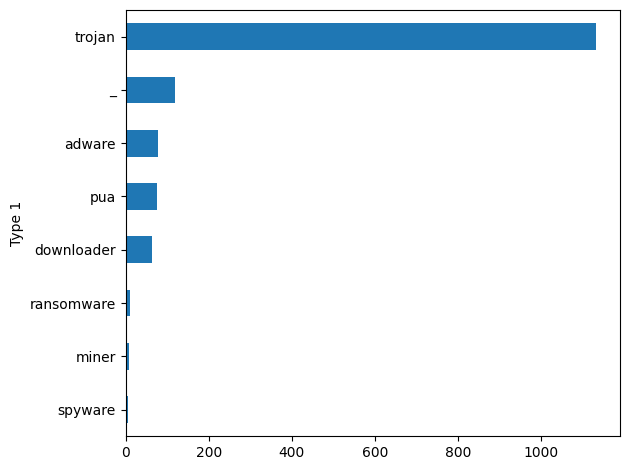

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

In [4]:
#Inject pattern (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

display(malicious_df)

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
0,-1,5e1f079fc9130cd508568da3cb0b219a,adware,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr...",adware _ _
4,-1,d93b214c093a9f1e07248962aeb74fc8,trojan,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr...",trojan _ _
5,0,bcc2e77229d428536091d0795980eb46,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",trojan _ _
6,0,c17a20fe53f3e9f0300a82bb371c7859,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",trojan _ _
7,0,b8454478faca0929d7078dc7d30fd913,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",trojan _ _
...,...,...,...,...,...,...,...
1490,297,05b379055a79c5e47bdabec418190ac7,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
1491,297,d8c65468405b789c56754336c1f8911b,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
1492,297,4b58a7c885df8e86be4769fd949d2c37,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _
1493,297,a4200ec0b146d8a0d37e90e32c674780,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan _ _


## "What Malware Types can be found in the dataset?"

How many instances of a certain malware type are there in the entire dataset per Type # (indicating popularity) as specified by VirusTotal (VT)?

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [5]:
output = malicious_df['Type 1'].value_counts()

In [6]:
str_output = ""
str_output += str() + "\n\n"
# str_output += str(malicious_df['Type 2'].value_counts()) + "\n\n"
# str_output += str(malicious_df['Type 3'].value_counts()) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()

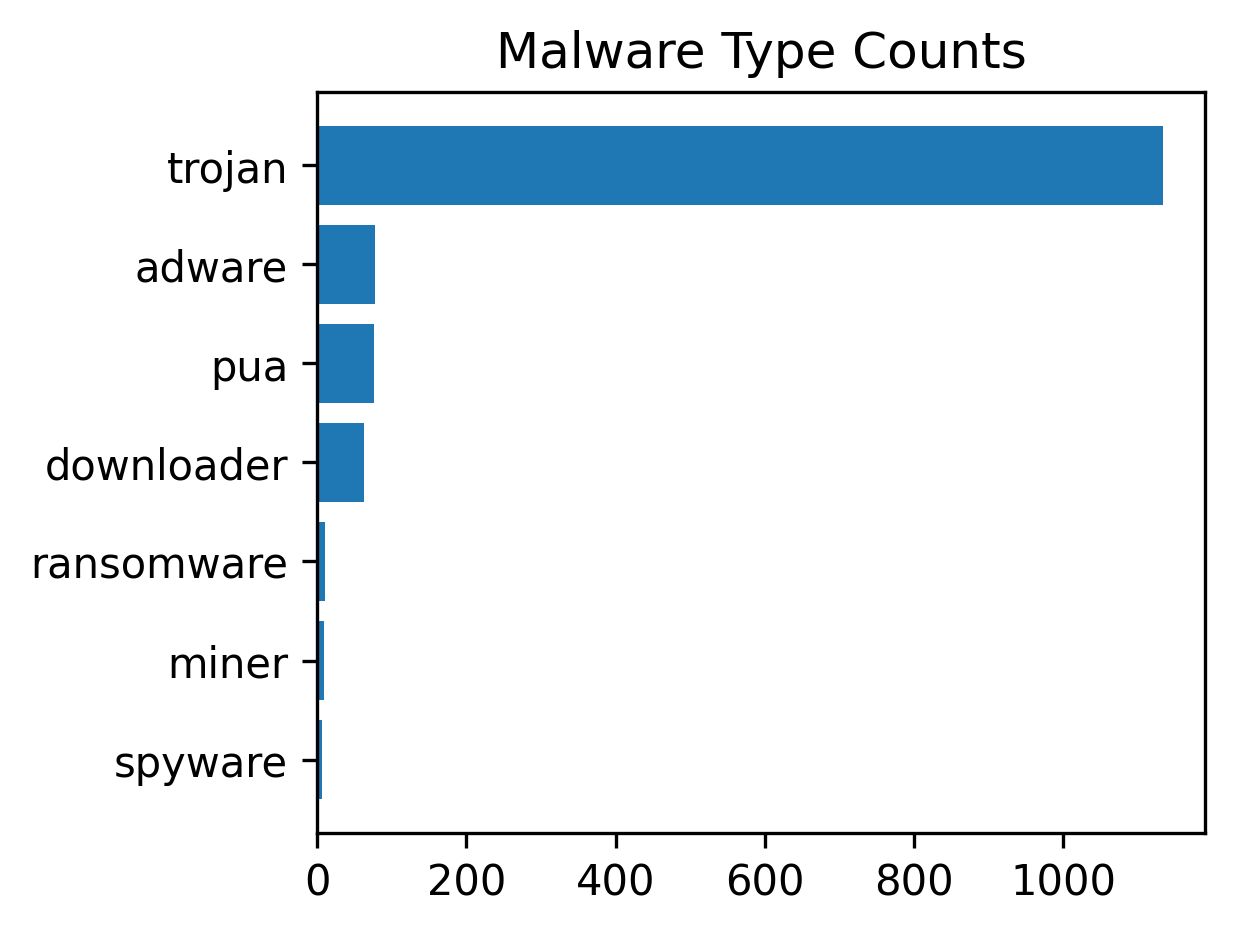

In [7]:
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"

This indicates what are the individual malware types mostly associated to cluster in terms of quantity regardless of order by popularity by VT.

Note that order matters as the first ones are the most popular labels as indicated by VT.

In [8]:
#Identify the overall list of types each cluster is as designated by VirusTotal.
unique_clusters = get_unique_clusters(malicious_df)

summary = []

for u in unique_clusters:
    cluster_sublist = [u]
    df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
    idx = list(df_copy['Type 1'].value_counts().index)
    counts = list(df_copy['Type 1'].value_counts())
    type_sublist = []
    for i in range(len(idx)):
        type_sublist.append([idx[i], counts[i]])
    cluster_sublist.append(type_sublist)
    # str_summary = []
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
    summary.append(cluster_sublist)

### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [9]:
str_output = ""
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER -1: adware (1); trojan (1); 
CLUSTER 0: trojan (5); 
CLUSTER 1: pua (5); 
CLUSTER 2: downloader (5); 
CLUSTER 3: trojan (5); 
CLUSTER 4: downloader (5); 
CLUSTER 5: adware (1); trojan (1); miner (1); downloader (1); 
CLUSTER 6: trojan (5); 
CLUSTER 7: trojan (5); 
CLUSTER 8: trojan (5); 
CLUSTER 9: trojan (5); 
CLUSTER 10: trojan (5); 
CLUSTER 11: trojan (4); adware (1); 
CLUSTER 12: trojan (2); adware (2); pua (1); 
CLUSTER 13: trojan (5); 
CLUSTER 14: trojan (5); 
CLUSTER 15: trojan (5); 
CLUSTER 16: trojan (3); downloader (2); 
CLUSTER 17: trojan (5); 
CLUSTER 18: trojan (5); 
CLUSTER 19: trojan (5); 
CLUSTER 20: trojan (5); 
CLUSTER 21: trojan (5); 
CLUSTER 22: trojan (5); 
CLUSTER 23: trojan (5); 
CLUSTER 24: trojan (5); 
CLUSTER 25: pua (5); 
CLUSTER 26: trojan (5); 
CLUSTER 27: trojan (5); 
CLUSTER 28: trojan (5); 
CLUSTER 29: trojan (5); 
CLUSTER 30: adware (2); pua (2); trojan (1); 
CLUSTER 31: trojan (5); 
CLUSTER 32: trojan (5); 
CLUSTER 33: trojan (5); 
CLUSTER 34: 

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [10]:
str_output = ""

# Summarize Clusters that have the same malware types as per VirusTotal.
str_output += f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 7

UNIQUE MALWARE TYPE: 1
Malware Type: adware
Matching Clusters Count: 41
Matching Clusters: [-1, 5, 11, 12, 30, 34, 45, 50, 73, 76, 81, 96, 102, 117, 121, 122, 130, 135, 141, 144, 145, 149, 158, 164, 165, 171, 178, 191, 192, 193, 195, 211, 218, 223, 225, 229, 235, 236, 243, 257, 269]

UNIQUE MALWARE TYPE: 2
Malware Type: trojan
Matching Clusters Count: 258
Matching Clusters: [-1, 0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 102, 103, 104, 106, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 16

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
6,trojan,258,"[-1, 0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ..."
5,adware,41,"[-1, 5, 11, 12, 30, 34, 45, 50, 73, 76, 81, 96..."
4,pua,32,"[1, 12, 25, 30, 37, 38, 59, 67, 70, 81, 93, 10..."
3,downloader,19,"[2, 4, 5, 16, 40, 49, 57, 59, 60, 72, 96, 98, ..."
1,miner,4,"[5, 56, 120, 229]"
2,ransomware,3,"[85, 89, 232]"
0,spyware,2,"[92, 291]"


The use of clustering stops only to assumptions only the entire dataset.

The remaining individual samples from the dataset cannot be ascertained with a specific malware type due to the clustering itself being not absolute/conclusive (take `trojan` and `adware` having clusters 3,12,13 as an example).


## Determine the API Calls in each Malware Type

This is limited by the verified malicious samples and may not be representative of the entire dataset (i.e., some API calls may be missing not available)

In [11]:
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

In [12]:
malware_types = count_summary['Malware Type'].to_list()

pd.set_option("display.max_rows", None)

print("API CALL QUANTITY PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    display(ser.value_counts())

API CALL QUANTITY PER MALWARE TYPE


trojan
LdrGetProcedureAddress               18515
LdrLoadDll                           11239
RegOpenKeyExW                         8168
LdrGetDllHandle                       7390
RegQueryValueExW                      6212
NtClose                               5395
LoadResource                          4820
RegCloseKey                           4566
FindResourceExW                       4508
NtAllocateVirtualMemory               4211
NtQueryValueKey                       2971
NtOpenKey                             2691
GetSystemTimeAsFileTime               2028
GetSystemMetrics                      1850
NtProtectVirtualMemory                1194
NtOpenKeyEx                           1068
GetSystemInfo                         1055
NtFreeVirtualMemory                    960
SetErrorMode                           953
CoInitializeEx                         864
SetFilePointer                         861
GetSystemDirectoryW                    831
NtReadFile                             822
SetU

adware
LdrGetProcedureAddress               1338
LdrGetDllHandle                       820
LdrLoadDll                            596
NtClose                               555
NtAllocateVirtualMemory               395
RegCloseKey                           350
RegOpenKeyExW                         322
NtOpenKey                             287
NtQueryValueKey                       245
RegQueryValueExW                      228
SetErrorMode                          130
GetSystemTimeAsFileTime               128
NtCreateFile                          127
GetSystemDirectoryW                    93
NtReadFile                             91
SetFilePointer                         91
GetSystemWindowsDirectoryW             91
NtFreeVirtualMemory                    90
NtMapViewOfSection                     90
RegOpenKeyExA                          83
LoadResource                           70
GetSystemMetrics                       70
SetUnhandledExceptionFilter            68
NtCreateSection            

pua
LdrGetProcedureAddress               1349
LdrLoadDll                            894
LdrGetDllHandle                       576
NtClose                               505
NtAllocateVirtualMemory               368
RegOpenKeyExW                         360
RegCloseKey                           290
RegQueryValueExW                      234
SetErrorMode                          212
NtOpenKey                             203
NtQueryValueKey                       191
NtCreateFile                          142
GetSystemDirectoryW                   140
SetFilePointer                        139
NtReadFile                            134
GetSystemMetrics                      117
NtMapViewOfSection                    116
GetSystemWindowsDirectoryW            109
LoadResource                           95
NtFreeVirtualMemory                    93
NtCreateSection                        88
FindResourceExW                        83
LoadStringW                            75
GetSystemInfo                 

downloader
LdrGetProcedureAddress               1553
LdrGetDllHandle                       934
LdrLoadDll                            586
FindResourceExW                       340
NtAllocateVirtualMemory               339
LoadResource                          332
NtClose                               285
RegCloseKey                           256
RegOpenKeyExW                         228
RegQueryValueExW                      159
NtOpenKey                             116
NtQueryValueKey                        97
GetSystemTimeAsFileTime                91
GetSystemMetrics                       89
RegOpenKeyExA                          86
RegQueryValueExA                       69
SetErrorMode                           62
NtFreeVirtualMemory                    59
NtMapViewOfSection                     54
NtCreateFile                           42
GetSystemWindowsDirectoryW             41
LoadStringW                            39
SetUnhandledExceptionFilter            36
NtCreateSection        

miner
LdrGetProcedureAddress         76
NtClose                        63
LdrGetDllHandle                57
SetFilePointer                 54
NtQueryAttributesFile          53
NtReadFile                     52
NtCreateFile                   49
NtMapViewOfSection             45
NtCreateSection                43
NtAllocateVirtualMemory        39
NtUnmapViewOfSection           35
LdrLoadDll                     28
RegOpenKeyExW                  26
RegCloseKey                    20
RegQueryValueExW               20
GetSystemWindowsDirectoryW     19
LdrUnloadDll                   15
GetSystemInfo                  15
GetSystemTimeAsFileTime        14
NtFreeVirtualMemory            11
closesocket                    10
WSAStartup                     10
socket                         10
NtDuplicateObject              10
GetSystemDirectoryW            10
SetErrorMode                    9
NtOpenKey                       8
NtQueryValueKey                 8
LoadResource                    8
LoadStri

ransomware
NtQuerySystemInformation      204
NtAllocateVirtualMemory       136
NtFreeVirtualMemory           124
NtClose                        88
CreateToolhelp32Snapshot       46
Process32NextW                 44
Process32FirstW                44
LdrGetProcedureAddress         38
LdrGetDllHandle                26
RegOpenKeyExW                  24
RegQueryValueExW               24
RegCloseKey                    24
LdrLoadDll                     18
NtMapViewOfSection             16
NtCreateSection                16
NtCreateFile                   16
NtOpenKey                      16
NtQueryValueKey                16
CreateThread                   12
GetSystemWindowsDirectoryW      8
NtCreateMutant                  8
GetTempPathW                    8
CryptAcquireContextW            8
GetFileSize                     8
NtQueryInformationFile          8
NtOpenFile                      8
NtDelayExecution                8
FindWindowW                     2
IsDebuggerPresent               2
Nam

spyware
FindResourceExW               95
LoadResource                  80
LdrGetProcedureAddress        74
LdrGetDllHandle               58
NtClose                       34
GetSystemMetrics              30
NtAllocateVirtualMemory       25
LdrLoadDll                    19
RegCloseKey                   16
LoadStringA                   15
NtQueryValueKey               13
RegOpenKeyExW                 13
NtOpenKey                     12
DrawTextExW                   10
RegOpenKeyExA                 10
NtCreateSection                7
NtMapViewOfSection             7
NtCreateFile                   7
GetSystemInfo                  7
GetSystemDirectoryW            7
RegQueryValueExW               6
GetSystemTimeAsFileTime        5
RegQueryInfoKeyW               5
NtFreeVirtualMemory            5
CreateThread                   5
GetSystemWindowsDirectoryW     5
RegQueryValueExA               5
NtQueryAttributesFile          5
NtOpenKeyEx                    3
NtOpenFile                     3
Nt

While the API Calls on each malware type above may be lacking in some degree, the following must be noted into consideration:

1. The API Calls were obtained from samples whose hashes were verified which is only 3% of the entire dataset. While statistically representative of the entire dataset, the clusterization of the dataset cannot be used as a ground truth for the malware types of all malicious-labelled samples (what about those samples that are falsely-labelled).

2. The author of the dataset only included the first 100 API Calls per sample which may indicate that not all expected API Calls may not have been captured and that only the prelude API Calls were only captured.

## Some Notable API Calls in each Malware Type
*You may add more in the write-up or paper.*

**trojan**

A type of malware that downloads onto a computer disguised as a legitimate program.

*This malware type is quite tricky as the API Calls may be made by  the legitimate process (i.e., pretending process) or the malicious process (i.e., underlying process).*

- GetSystemTimeAsFileTime, GetSystemMetrics, GetSystemInfo, GetSystemDirectory, GetSystemWindowsDirectory, GetNativeSystemInfo, GetTimeZoneInformation, GetComputerNameW, GetAdaptersInfo, LookupAccountSidW: 

	- Checks for system parameters, configuration, and environment.

- NtFreeVirtualMemory, NtAllocateVirtualMemory, NtProtectVirtualMemory: 

	- Possible attempts to protect/hide its process stored in the virtual memory (either the legit or malicious process).

- RegEnumKeyW, RegQueryInfoKeyW, RegQueryValueExW, RegCreateKeyExW, RegCreateKeyExA, RegOpenKeyExA, RegOpenKeyExW, RegCloseKey: 

	- Checks, creates/modifies registry key and values.

- socket, InternetOpenA, InternetSetOptionA, InternetConnectA, HttpOpenRequestA, closesocket:

	- Possible attempts to establish network/internet connection(s).

- CryptHashData, CryptCreateHash:

	- Possible attempts to create hash object(s) and hashed data.

- DrawTextExW, DrawTextExA, GetCursorPos

	- Use of GUI elements.

-  CreateThread, NTResumeThread, NtCreateThreadEx, NtSuspendThread, NtOpenThread

	- Possible indication of creating a child process (either as the legitimate or malicious process).

**adware**

A type of malicious software that secretly installs itself on your device and displays unwanted advertisements and pop-ups.

*Behavior not any different to trojan (more specifically its non-malicious actions) as adwares are a `grayware` which while not dangerous can be annoying.*

**downloader**

Secretly downloads malicious files from a remote server, then installs and executes the files.

*Supringsingly, there are no network-related API Calls found in the list. However, it is possible that the samples on this malware type may have opted to use a child process instead for downloading the payload.*

- NtOpenProcess, NtCreateSection, NtOpenSection

	- Possible attempts to create a child process for downloading the payload.

- GetSystemFileAsFileTime, SetFilePointer,  NtWriteFile,  GetFileSize, NtReadFile:

	- Possible attempts to write and read files.

**pua**

Potentially Unwanted Applications (PUAs) are unwanted software programs that come bundled in legitimate free software programs as a package.

*Similar to adware, behavior not any different to trojan (more specifically its non-malicious actions) & adware as puas are a `grayware` which while not dangerous can be annoying.*

**miner**

A form of malware that hides on your device and steals its computing resources in order to mine for valuable online currencies like Bitcoin.

- GetSystemInfo

	- Possible attempts to determine system capability for mining.

- NtCreateFile, SetFilePointer, 

	- Possible attempts to writing outputs of cryptomining activity.

- WSAStartup, socket, closesocket

	- Possible attempts to establish connection to C&C

**ransomware**

A type of malware that prevents or limits users from accessing their system, either by locking the system's screen or by locking the users' files until a ransom is paid.

- NtQuerySystemInformation: 

	- Possible attempts to determine policy information which could determine access to files/directories.

- CreateThread: 

	- Possible attempts create child processes, whether for expediting encryption, interfacing with victim, or contacting C&C.

- CryptAcquireContextW: 

	- Possible attemptes to obtaining handle on CryptoAPI calls.

- NtOpenFile, NtCreateFile: 

	- Possible attempts in opening and reading file for encryption.

	- Possible attempts in leaving ransom artifacts (e.g., ransomnotes, encrypted files).

- NtDelayExecution: 

	- Possible attempts at suspending other applications that are using a file which may invervene with its encryption task.

**virus**

A specific type of malware that self-replicates by inserting its code into other programs.

*No notable API Calls, eccept on registry and file/memory related API Calls.*

**hacktool**

Used to create new users in the list of permitted system visitors, and to delete information from system logs in order to hide the malicious user's presence on the system. 
It can be used to "crack" or patch unregistered copies of legitimate software.

- GetSystemMetrics:

	- Possible attempts in determining system metrics and configuration settings.

- IsDebuggerPresent:

	- Possible attempts in determinig if it is being run on a debugger to avoid proceeding further.

- DeleteFileW, NtCreateFile, NtWriteFile

	- Possible attempts in deleting and replacing license related files on systems.

**dropper**

A kind of Trojan that has been designed to "install" malware (virus, backdoor, etc.) to a computer

*Supringsingly, there are no network-related API Calls found in the list.*

